# The best console games of all time!

This will be your last assessment and thus, it will be somewhat longer than any of the other assessments. You will be doing everything we have covered in class and publishing the results on GitHub.

1. Go to [Kaggle Datasets](https://www.kaggle.com/datasets) and pick a dataset of your choosing. Preferrably in CSV or TSV format.
2. Open a new Jupyter Notebook and give this Mini Assessment a compelling title.
3. Add two to three paragraphs where you first describe the dataset and then the reason why you chose it.
4. Create a table of contents that holds the general steps of the data analytics cycle.
5. Create a section called **Load Data** and read in your data using pandas. Make sure you use at least one of the additional arguments of the method `.read_csv()`.
6. Create a new section and inspect your data. Finish that section with 4 or 5 sentences on what you saw in the data. Any Inconsistencies or issues that where easy to spot since the beginning.
7. Create a new section and get and deal with the missing values. At the end of the new section, write at least two paragraphs explaining the steps you took for dealing with missing values. Make sure you outlined any of the assumptions in your process, e.g. the distribution of X variable was highly skewed so I choose to fill in values using the median instead.
8. Describe and visualise your data. Call this Section Exploratory Data Analysis.
    - Create at least 2 pivot tables and describe what is in it. Your aggregation function, variables chosen, etc.
    - Use at least 2 `.groupby()` methods and explain your logic behind it.
    - Create 7 visualisations showing different variables and combinations of your variables. At least one of them has to be interactive. They should have a title, and labels where appropriate. Explain each one of your charts with at least a paragraph.
9. Write a concluding paragraph summarising what you have done.
10. Add a section called **Future Work** and add at least 5 hypotheses that would be interesting for you to test with that data later on.
11. Create a folder for this mini-assessment. Add a README.md file and explain what your notebook contains. Share the link to your repo with a classmate kindly requesting feedback. Send it to your instructor as well.

# I. Setup environment

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import pandas as pd

In [5]:
pd.set_option('display.max_columns', 15)

In [6]:
plt.style.use('fivethirtyeight')

In [7]:
pd.set_option('display.max_rows', 15)

In [8]:
pd.options.display.float_format = '{:.2f}'.format

In [9]:
%matplotlib inline

# II. Map to datasource

In [10]:
csv_file = 'games.csv'

In [11]:
df = pd.read_csv('games.csv')

# III. Load Data

__Raw data from 'games.csv':__

In [12]:
print(df)

        Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0     2006.00        Sport

__Present head of table as 10 rows:__<br>
NB: Count starts at 0 (zero)

In [13]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.00,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.00,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.00,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.00,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.00,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.00,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.00,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.00,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.00,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


__Identify columns and column types:__

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


__Drop data columns which are not needed for this analysis:__

In [15]:
df.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1, inplace=True)

__Confirm remaining columns are correct:__

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   Global_Sales  16598 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 907.8+ KB


__Data gaps:__<br>Identify any issues with the data from the CSV file. Data problems here will ultimately cause errors.

In [17]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
Global_Sales      0
dtype: int64

271 issues identified in the Year column. Let's investigate further!

In [18]:
df[df['Year'].isnull()]

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
179,180,Madden NFL 2004,PS2,nan,Sports,Electronic Arts,5.23
377,378,FIFA Soccer 2004,PS2,nan,Sports,Electronic Arts,3.49
431,432,LEGO Batman: The Videogame,Wii,nan,Action,Warner Bros. Interactive Entertainment,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,nan,Fighting,NaN,3.00
607,608,Space Invaders,2600,nan,Shooter,Atari,2.53
...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,nan,Racing,Unknown,0.01
16327,16330,Inversion,PC,nan,Shooter,Namco Bandai Games,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,nan,Adventure,Unknown,0.01
16427,16430,Virtua Quest,GC,nan,Role-Playing,Unknown,0.01


Lets get an idea of the starting numbers...

In [19]:
df.shape

(16598, 7)

Time for some 'housekeeping'...

In [20]:
df = df[df['Year'].notna()]

In [21]:
df.shape

(16327, 7)

In [22]:
df[df['Year'].isnull()]

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales


Success!

Success!

## Identifying the most popular gaming platform

In [23]:
groupby_Platform = df.groupby('Platform')

In [24]:
groupby_Platform.groups

{'2600': Int64Index([   89,   239,   258,   544,   734,   766,   864,  1106,  1115,
              1153,
             ...
              7904,  8457,  8458,  8459,  8757,  8758,  9106,  9495, 11716,
             11749],
            dtype='int64', length=116),
 '3DO': Int64Index([12635, 14996, 15479], dtype='int64'),
 '3DS': Int64Index([   32,    42,    49,    53,    64,    73,    97,   188,   234,
               268,
             ...
             16462, 16468, 16472, 16494, 16512, 16528, 16535, 16542, 16567,
             16578],
            dtype='int64', length=500),
 'DC': Int64Index([  637,   959,  1677,  1709,  1793,  1877,  3823,  4686,  5152,
              5259,  5357,  5535,  5697,  6058,  6450,  6984,  7250,  7526,
              7654,  7994,  8111,  8318,  8916,  9067,  9093,  9164,  9555,
              9672,  9842, 10369, 10525, 10538, 10653, 10678, 10995, 11232,
             11291, 11363, 11515, 11900, 12061, 12269, 12272, 12466, 12814,
             13067, 13213, 13242, 13873, 

In [25]:
for name, group in groupby_Platform:
    print(name + ": " + str(len(group)))
    print(group)
    print()

2600: 116
        Rank                   Name Platform    Year     Genre     Publisher  \
89        90                Pac-Man     2600 1982.00    Puzzle         Atari   
239      240               Pitfall!     2600 1981.00  Platform    Activision   
258      259              Asteroids     2600 1980.00   Shooter         Atari   
544      545        Missile Command     2600 1980.00   Shooter         Atari   
734      736                Frogger     2600 1981.00    Action  Parker Bros.   
...      ...                    ...      ...     ...       ...           ...   
8758    8760        Pressure Cooker     2600 1982.00    Action    Activision   
9106    9108                  Krull     2600 1982.00    Action         Atari   
9495    9497  RealSports Volleyball     2600 1981.00    Sports         Atari   
11716  11718         Super Football     2600 1987.00    Sports         Atari   
11749  11751         Super Baseball     2600 1987.00    Sports         Atari   

       Global_Sales  
89     

In [26]:
df_Platform_cnt = pd.DataFrame({'Count' : groupby_Platform.size()}).reset_index()
df_Platform_cnt

,Platform,Count
0,2600,116
1,3DO,3
2,3DS,500
3,DC,52
4,DS,2133
...,...,...
26,Wii,1290
27,WiiU,143
28,X360,1235
29,XB,803


In [27]:
df_Platform_cnt.sort_values('Count')

,Platform,Count
9,GG,1
14,PCFX,1
24,TG16,2
1,3DO,3
25,WS,6
...,...,...
28,X360,1235
26,Wii,1290
17,PS3,1304
16,PS2,2127


In [28]:
df_Platform_cnt.sort_values('Count', ascending = False)

,Platform,Count
4,DS,2133
16,PS2,2127
17,PS3,1304
26,Wii,1290
28,X360,1235
...,...,...
25,WS,6
1,3DO,3
24,TG16,2
14,PCFX,1


In [29]:
groupby_Genre = df.groupby('Genre')

In [30]:
df_Genre_cnt = pd.DataFrame({'Count' : groupby_Genre.size()}).reset_index()
df_Genre_cnt

,Genre,Count
0,Action,3253
1,Adventure,1276
2,Fighting,836
3,Misc,1710
4,Platform,876
5,Puzzle,571
6,Racing,1226
7,Role-Playing,1471
8,Shooter,1282
9,Simulation,851


In [31]:
df_Genre_cnt.sort_values('Count', ascending = False)

,Genre,Count
0,Action,3253
10,Sports,2304
3,Misc,1710
7,Role-Playing,1471
8,Shooter,1282
1,Adventure,1276
6,Racing,1226
4,Platform,876
9,Simulation,851
2,Fighting,836


In [32]:
groupby_Publisher = df.groupby('Publisher')

In [33]:
df_Publisher_cnt = pd.DataFrame({'Count' : groupby_Publisher.size()}).reset_index()
df_Publisher_cnt

,Publisher,Count
0,10TACLE Studios,3
1,1C Company,3
2,20th Century Fox Video Games,5
3,2D Boy,1
4,3DO,36
...,...,...
571,id Software,1
572,imageepoch Inc.,2
573,inXile Entertainment,1
574,"mixi, Inc",1


In [34]:
df_Publisher_cnt.sort_values('Count', ascending = False)

,Publisher,Count
138,Electronic Arts,1339
21,Activision,966
347,Namco Bandai Games,928
524,Ubisoft,918
275,Konami Digital Entertainment,823
...,...,...
149,Ertain,1
147,Epic Games,1
447,Seventh Chord,1
145,Enjoy Gaming ltd.,1


In [35]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
0,1,Wii Sports,Wii,2006.00,Sports,Nintendo,82.74
1,2,Super Mario Bros.,NES,1985.00,Platform,Nintendo,40.24
2,3,Mario Kart Wii,Wii,2008.00,Racing,Nintendo,35.82
3,4,Wii Sports Resort,Wii,2009.00,Sports,Nintendo,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,Nintendo,31.37


In [36]:
pd.set_option('display.max_rows', None)

In [37]:
pivot1 = df.pivot_table(index=['Platform'], values=['Global_Sales'], aggfunc='sum',  fill_value=0)

In [38]:
pivot1

,Global_Sales
Platform,
2600,86.57
3DO,0.10
3DS,246.28
DC,15.97
DS,818.96
GB,254.42
GBA,313.56
GC,197.14
GEN,28.36


In [39]:
pivot2 = df.pivot_table(index=['Year'], values=['Global_Sales'], aggfunc='sum',  fill_value=0)

In [40]:
pivot2

,Global_Sales
Year,
1980.00,11.38
1981.00,35.77
1982.00,28.86
1983.00,16.79
1984.00,50.36
1985.00,53.94
1986.00,37.07
1987.00,21.74
1988.00,47.22


In [41]:
rank = df.Rank[0:15]
gsales = df.Global_Sales[0:15]

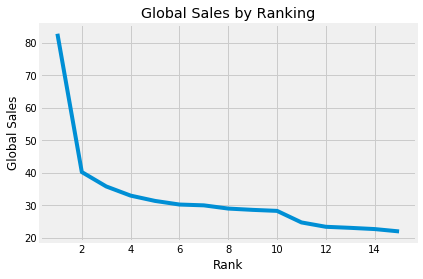

In [42]:
plt.title("Global Sales by Ranking")
plt.plot(rank, gsales) 
plt.xlabel("Rank") 
plt.ylabel("Global Sales") 
  
plt.show() 

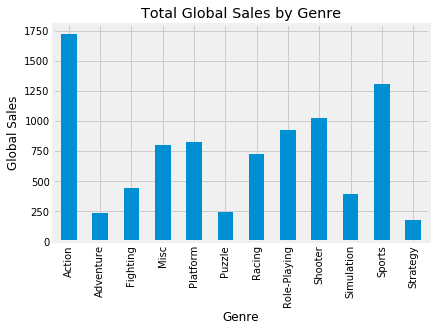

In [43]:
df.groupby('Genre')['Global_Sales'].sum().plot.bar()
plt.title("Total Global Sales by Genre")
plt.xlabel("Genre") 
plt.ylabel("Global Sales")
print()

In [44]:
df = df.convert_dtypes()

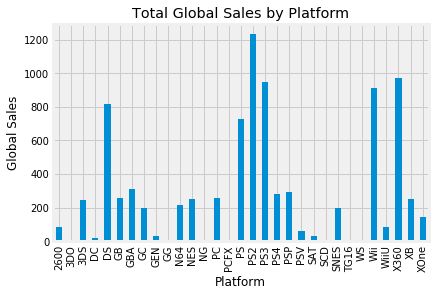

In [45]:
df.groupby('Platform')['Global_Sales'].sum().plot.bar()
plt.title("Total Global Sales by Platform")
plt.xlabel("Platform") 
plt.ylabel("Global Sales")
print()

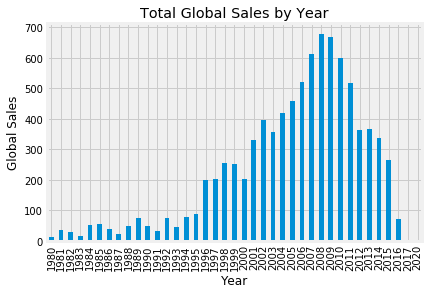

In [46]:
df.groupby('Year')['Global_Sales'].sum().plot.bar()
plt.title("Total Global Sales by Year")
plt.xlabel("Year") 
plt.ylabel("Global Sales")
print()

In [47]:
YearCount = df.Year.value_counts()

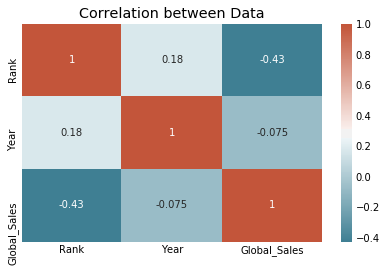

In [48]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title("Correlation between Data")
print();

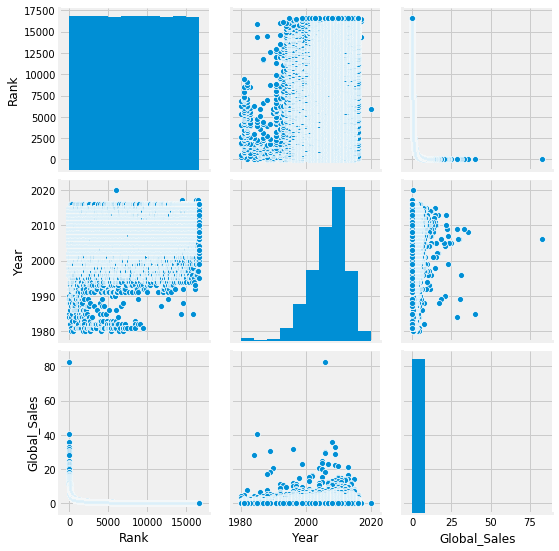

In [49]:
sns.pairplot(df)
print();

Group Gaming Consoles by Company Brand

In [50]:
PS2 = df[df.Platform == 'PS2']

In [51]:
df['Year'].dtypes

Int64Dtype()

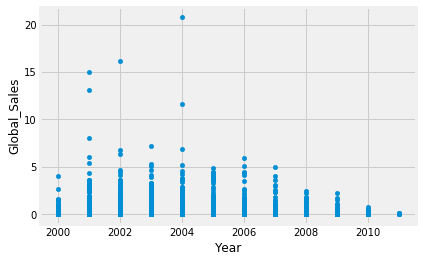

In [52]:
PS2.plot.scatter("Year", "Global_Sales")

In [53]:
Nintendo = df[(df.Platform == 'Wii') | (df.Platform == 'NES') | (df.Platform == 'GB')]

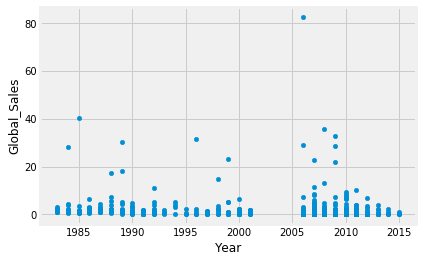

In [54]:
Nintendo.plot.scatter("Year", "Global_Sales")

In [55]:
Wii = df[(df.Platform == 'Wii')]

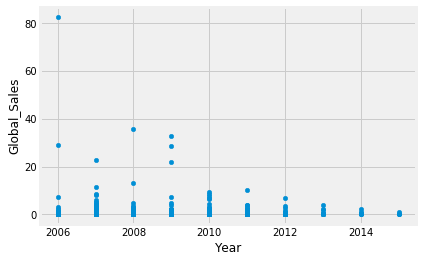

In [56]:
Wii.plot.scatter("Year", "Global_Sales")

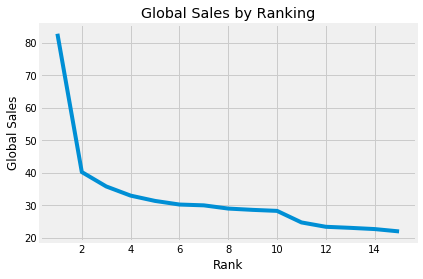

In [57]:
plt.title("Global Sales by Ranking")
plt.plot(rank, gsales) 
plt.xlabel("Rank") 
plt.ylabel("Global Sales") 
  
plt.show() 